In [1]:
print("KNN algorithom")

KNN algorithom


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [3]:
#load data set 
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
21,22,5.1,3.7,1.5,0.4,Iris-setosa
85,86,6.0,3.4,4.5,1.6,Iris-versicolor
57,58,4.9,2.4,3.3,1.0,Iris-versicolor
42,43,4.4,3.2,1.3,0.2,Iris-setosa
0,1,5.1,3.5,1.4,0.2,Iris-setosa


<Axes: ylabel='Count'>

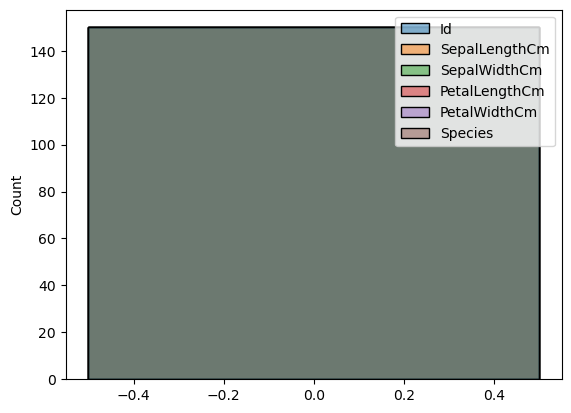

In [5]:
sns.histplot(df.isnull())

In [6]:
df.shape

(150, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.select_dtypes('float64')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
#fearure and target separation
x_feature=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_target=[['Species']]

In [10]:
#here our target column is string so we encoded the feature 
#label encodding korbo  ai khan a amra 
from sklearn.preprocessing import  LabelEncoder

le=LabelEncoder()

y_encoded=le.fit_transform(df['Species'])

y_encoded




array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
#konta kar jonno koto encoding korese ta amra dekboo 
print('0 is the name of flower : ',le.inverse_transform([0]))
print('1 is the name of flower : ',le.inverse_transform([1]))
print('2 is the name of flower : ',le.inverse_transform([2]))

0 is the name of flower :  ['Iris-setosa']
1 is the name of flower :  ['Iris-versicolor']
2 is the name of flower :  ['Iris-virginica']


In [13]:
#train test split the data set 
from sklearn.model_selection import train_test_split

x_feature_train,x_feature_test,y_encoded_train,y_encoded_test=train_test_split(x_feature,y_encoded,test_size=0.2,random_state=42)

x_feature_train.shape
y_encoded_train.shape

(120,)

In [ ]:
#scaling 
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_feature_train_scale=scaler.fit_transform(x_feature_train)
x_feature_test_scale=scaler.transform(x_feature_test)

x_feature_train_scale

array([[-1.47393679,  1.22037928, -1.5639872 , -1.30948358],
       [-0.13307079,  3.02001693, -1.27728011, -1.04292204],
       [ 1.08589829,  0.09560575,  0.38562104,  0.28988568],
       [-1.23014297,  0.77046987, -1.21993869, -1.30948358],
       [-1.7177306 ,  0.32056046, -1.39196294, -1.30948358],
       [ 0.59831066, -1.25412249,  0.72966956,  0.95628954],
       [ 0.72020757,  0.32056046,  0.44296246,  0.42316645],
       [-0.74255534,  0.99542457, -1.27728011, -1.30948358],
       [-0.98634915,  1.22037928, -1.33462153, -1.30948358],
       [-0.74255534,  2.34515281, -1.27728011, -1.44276436],
       [-0.01117388, -0.80421307,  0.78701097,  0.95628954],
       [ 0.23261993,  0.77046987,  0.44296246,  0.55644722],
       [ 1.08589829,  0.09560575,  0.5576453 ,  0.42316645],
       [-0.49876152,  1.8952434 , -1.39196294, -1.04292204],
       [-0.49876152,  1.44533399, -1.27728011, -1.30948358],
       [-0.37686461, -1.47907719, -0.01576889, -0.24323741],
       [ 0.59831066, -0.

In [ ]:
#train the model ecludien

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(x_feature_train_scale,y_encoded_train)
y_pred=knn.predict(x_feature_test_scale)

print(accuracy_score(y_encoded_test,y_pred))

1.0


In [17]:
#train the model manhattan

knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=1)
knn.fit(x_feature_train_scale,y_encoded_train)
y_pred=knn.predict(x_feature_test_scale)

print(accuracy_score(y_encoded_test,y_pred))

1.0


In [18]:
#here in different different K to predict the value 

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski',p=2)

    knn.fit(x_feature_train_scale,y_encoded_train)
    y_pred=knn.predict(x_feature_test_scale)
    print(accuracy_score(y_encoded_test,y_pred))


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9666666666666667
1.0
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9666666666666667
0.9333333333333333
0.9666666666666667
0.9666666666666667
